In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import json
%matplotlib inline

In [2]:
# chunks = pd.read_json('combined_day.json', lines=True, chunksize=100000)
# df = pd.concat(chunks)
# df.to_pickle('combined_day.pkl', compression='gzip')

df = pd.read_pickle('combined_day.pkl', compression='gzip')

In [3]:
df.head()

,_host,ad_network_id,ad_type,adlog_count,advertiser_id,bid_requests,bid_responses,c_cnt,c_flag_cnt,c_timestamp,...,ua_os_name,url,user_agent,uuid,vi_cnt,vi_flag_cnt,vi_timestamp,vv_cnt,widget_id,zone_id
0,an-prod-ralphie-frontline-bulks.us-east-1,1349,[story],1,3587,[],[],0.0,0.0,NaN,...,iOS,http://media.breitbart.com/media/if/newsmax.html,Mozilla/5.0 (iPad; CPU OS 10_3_3 like Mac OS X...,60039c05-5285-49ca-b4eb-a435e9d8352b,0.0,0.0,NaN,0.0,NaN,26024
1,an-prod-ralphie-frontline-bedim.us-east-1,1349,[story],1,3587,[],[],0.0,0.0,NaN,...,iOS,http://media.breitbart.com/media/if/newsmax.html,Mozilla/5.0 (iPad; CPU OS 11_2_6 like Mac OS X...,504e4902-4a71-4155-9de8-32e4afc00013,0.0,0.0,NaN,0.0,NaN,26024
2,an-prod-ralphie-frontline-bedim.us-east-1,767,[story],1,4735,[],[],0.0,0.0,NaN,...,iOS,http://thehill.com/policy/national-security/38...,Mozilla/5.0 (iPad; CPU OS 11_2_6 like Mac OS X...,c182f217-aff0-4f43-b74c-8c19344efbbf,1.0,0.0,2018-04-01T00:39:06.102000Z,0.0,NaN,18310
3,an-prod-ralphie-frontline-goofs.us-east-1,727,[story],1,4909,[],[],NaN,NaN,NaN,...,Android,http://getpocket.com,NaN,429TaA7bgeWM3pk04ed1783dc1p4g4e349bc6flc28o91b...,NaN,NaN,NaN,NaN,NaN,14414
4,an-prod-ralphie-frontline-soths.us-east-1,1349,[story],1,3587,[],[],0.0,0.0,NaN,...,Android,http://media.breitbart.com/media/if/newsmax.html,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-T8...,1a95be28-1ffe-4e21-8c1f-3e3838c61526,0.0,0.0,NaN,0.0,NaN,26024


In [3]:
df.shape

(2262922, 75)

In [4]:
df.columns

Index(['_host', 'ad_network_id', 'ad_type', 'adlog_count', 'advertiser_id',
       'bid_requests', 'bid_responses', 'c_cnt', 'c_flag_cnt', 'c_timestamp',
       'c_txn_fee', 'c_txn_rate', 'campaign_id', 'campaign_type', 'ck',
       'cr_cnt', 'creative_id', 'exp_mode', 'f_cnt', 'f_nfr', 'f_timestamp',
       'flag', 'geo_area_code', 'geo_city_code', 'geo_city_name',
       'geo_continent_code', 'geo_country_code2', 'geo_country_code3',
       'geo_dma_code', 'geo_postal_code', 'geo_region_name', 'geo_timezone',
       'i_cnt', 'i_flag_cnt', 'i_timestamp', 'i_txn_fee', 'i_txn_rate',
       'ip_address', 'is_bot', 'is_fraud', 'keywords', 'num_ads', 'preview',
       'pub_campaign_id', 'pub_network_id', 'r_cnt', 'r_num_ads_requested',
       'r_num_ads_returned', 'r_num_ads_third_party', 'r_timestamp',
       'rate_metric', 'referer', 'session_id', 'site_id', 'tag_value', 'token',
       'txn_fee', 'txn_rate', 'ua', 'ua_device', 'ua_device_type', 'ua_major',
       'ua_minor', 'ua_name', 

In [5]:
df._get_numeric_data().columns

Index(['ad_network_id', 'adlog_count', 'advertiser_id', 'c_cnt', 'c_flag_cnt',
       'c_txn_fee', 'c_txn_rate', 'campaign_id', 'cr_cnt', 'creative_id',
       'exp_mode', 'f_cnt', 'f_nfr', 'flag', 'geo_area_code', 'geo_city_code',
       'geo_dma_code', 'i_cnt', 'i_flag_cnt', 'i_txn_fee', 'i_txn_rate',
       'is_bot', 'is_fraud', 'num_ads', 'preview', 'pub_campaign_id',
       'pub_network_id', 'r_cnt', 'r_num_ads_requested', 'r_num_ads_returned',
       'r_num_ads_third_party', 'site_id', 'tag_value', 'txn_fee', 'txn_rate',
       'ua_major', 'ua_minor', 'vi_cnt', 'vi_flag_cnt', 'vv_cnt', 'zone_id'],
      dtype='object')

In [6]:
# not sure about ua_major and ua_minor
numeric_cols = ['adlog_count', 'c_cnt', 'c_flag_cnt', 'c_txn_fee', 'c_txn_rate', 'cr_cnt', 'f_cnt',
                'i_cnt', 'i_flag_cnt', 'i_txn_fee', 'i_txn_rate', 'num_ads', 'r_cnt', 'r_num_ads_requested',
                'r_num_ads_returned', 'r_num_ads_third_party', 'ua_major', 'ua_minor',
                'txn_fee', 'txn_rate', 'vi_cnt', 'vi_flag_cnt', 'vv_cnt']
df[numeric_cols].describe()

,adlog_count,c_cnt,c_flag_cnt,c_txn_fee,c_txn_rate,cr_cnt,f_cnt,i_cnt,i_flag_cnt,i_txn_fee,...,r_num_ads_requested,r_num_ads_returned,r_num_ads_third_party,ua_major,ua_minor,txn_fee,txn_rate,vi_cnt,vi_flag_cnt,vv_cnt
count,2262922.0,1.724754e+06,1.724754e+06,429.000000,429.000000,2262922.0,1.724754e+06,1.724754e+06,1.724754e+06,4.916210e+05,...,2.262922e+06,2.262922e+06,2262922.0,2.250318e+06,2.250152e+06,492050.000000,492050.000000,1.724754e+06,1.724754e+06,1724754.0
mean,1.0,6.870545e-04,2.759814e-03,0.087366,0.174732,1.0,1.159586e-06,9.959507e-01,4.007412e-02,2.512098e-07,...,6.876200e+00,6.758201e+00,0.0,3.596250e+01,5.941702e+02,0.000076,0.001680,1.997195e-01,3.172626e-03,0.0
std,0.0,2.620273e-02,5.303298e-02,0.026602,0.053203,0.0,1.076840e-03,6.350495e-02,4.301303e-01,5.048779e-06,...,3.774829e+00,3.732773e+00,0.0,3.465491e+01,3.050560e+03,0.002695,0.006421,3.997896e-01,5.892514e-02,0.0
min,1.0,0.000000e+00,0.000000e+00,0.050000,0.100000,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0
25%,1.0,0.000000e+00,0.000000e+00,0.075000,0.150000,1.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,4.000000e+00,4.000000e+00,0.0,1.100000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0
50%,1.0,0.000000e+00,0.000000e+00,0.075000,0.150000,1.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+01,1.000000e+01,0.0,1.600000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0
75%,1.0,0.000000e+00,0.000000e+00,0.100000,0.200000,1.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+01,1.000000e+01,0.0,6.500000e+01,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0
max,1.0,1.000000e+00,5.000000e+00,0.295000,0.590000,1.0,1.000000e+00,1.000000e+00,1.510000e+02,1.750000e-04,...,1.000000e+01,1.000000e+01,0.0,2.017000e+03,9.990000e+04,0.295000,0.590000,1.000000e+00,6.000000e+00,0.0


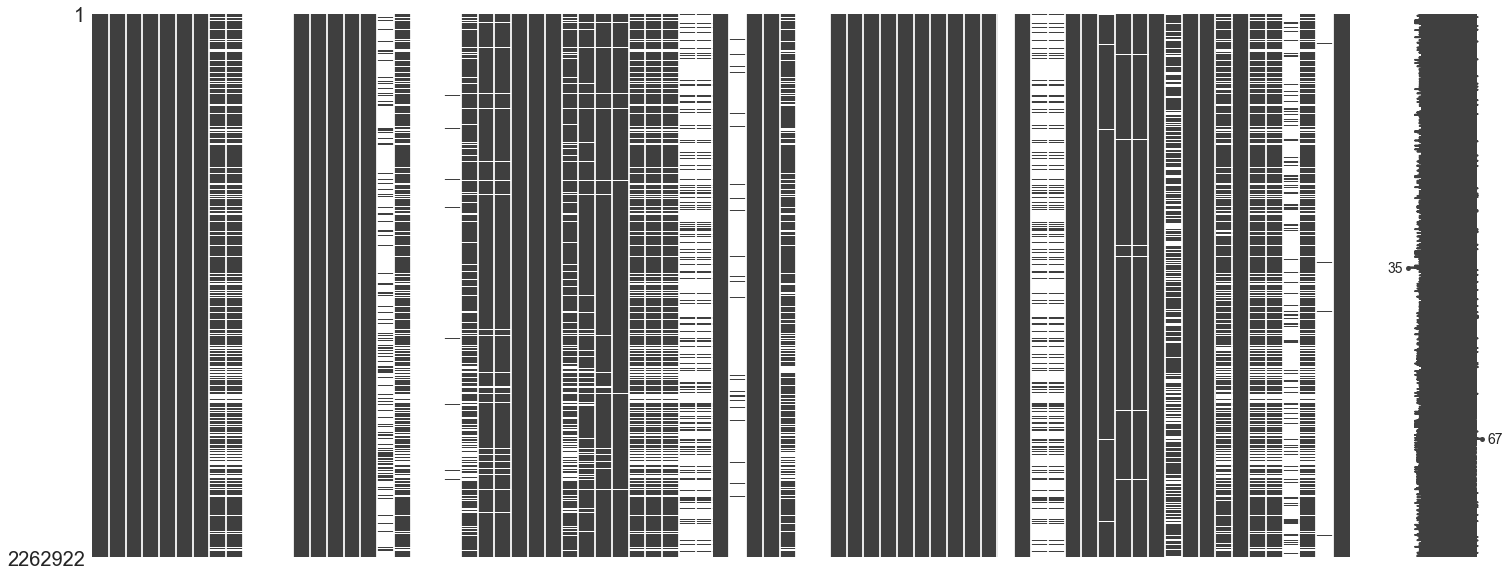

In [7]:
msno.matrix(df)

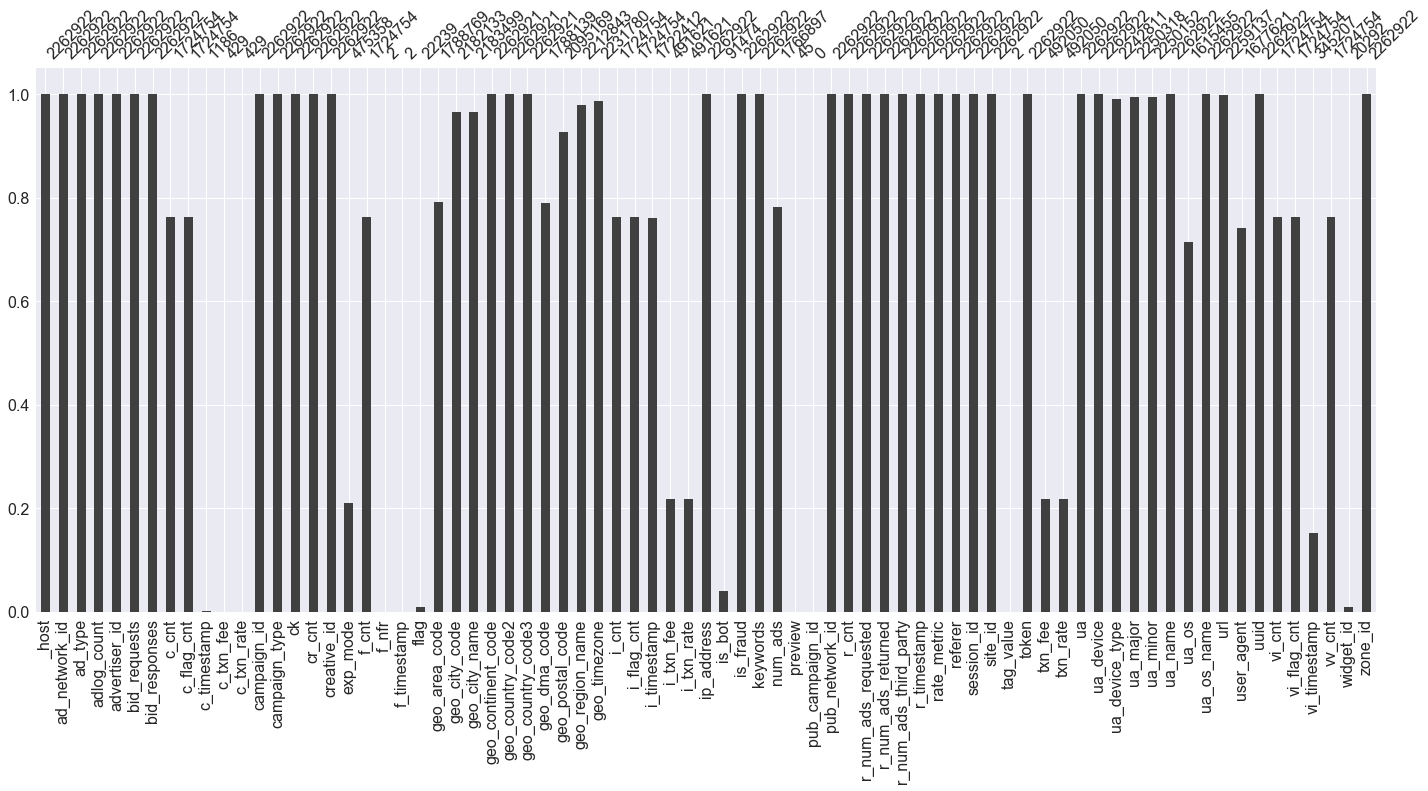

In [8]:
msno.bar(df)

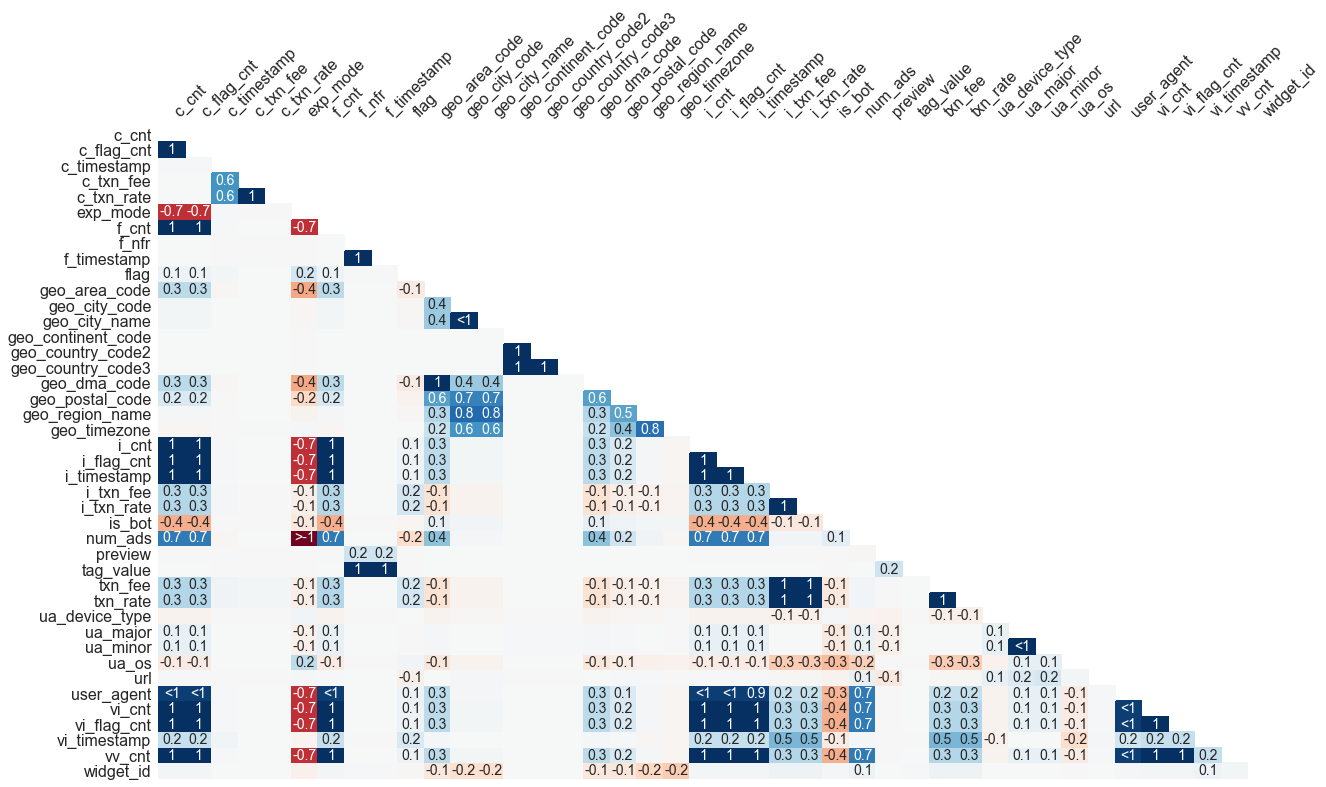

In [9]:
msno.heatmap(df)

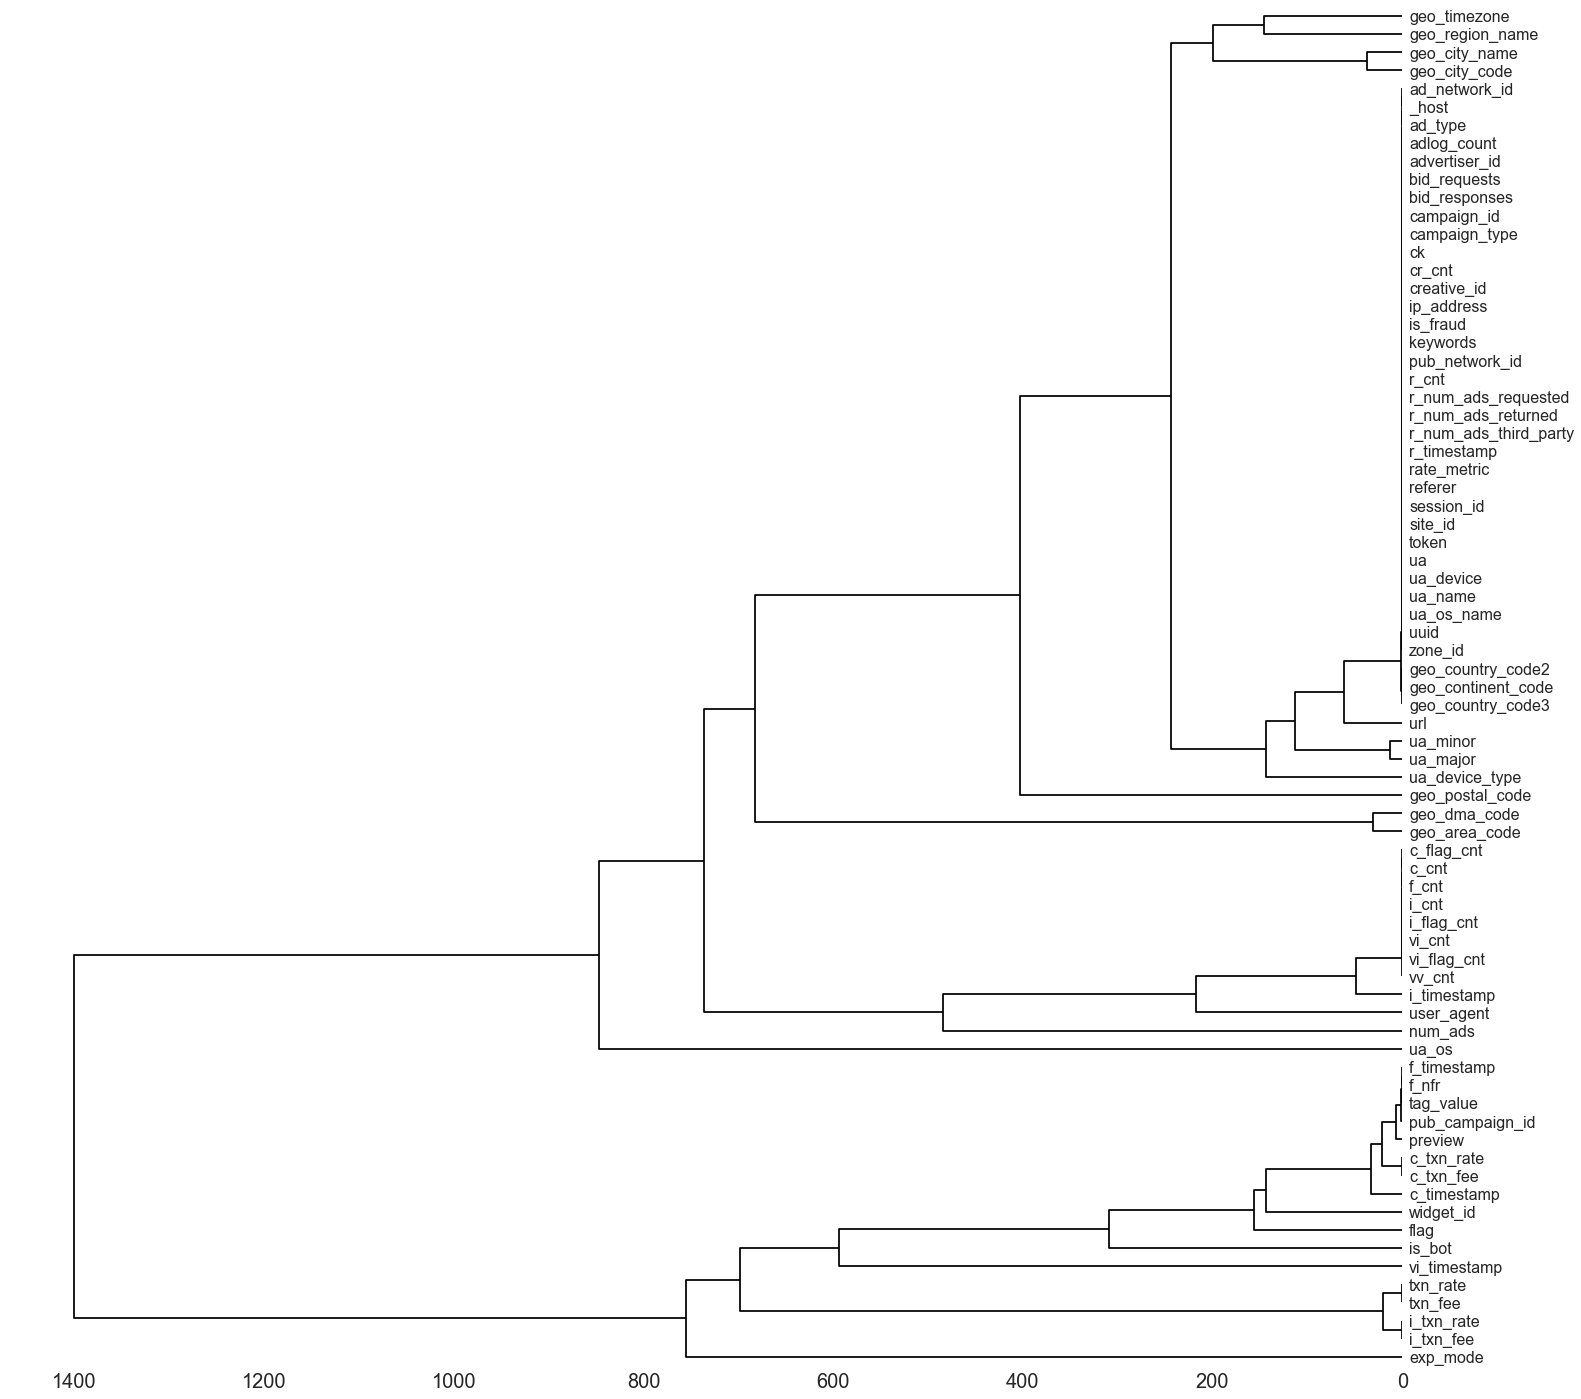

In [10]:
msno.dendrogram(df)

In [11]:
nullity_threshold = 0.8 # percentage of column that must be nonnull

#filter rows with c_cnt as NaN
clean_df = df[np.isfinite(df['c_cnt'])]

#filter threshhold
clean_df = clean_df.dropna(thresh=int(nullity_threshold*len(clean_df)), axis=1)

#drop all samples with NaN values
clean_df = clean_df.dropna(axis=0)

clean_df.shape

(1385181, 57)

In [12]:
set(df.columns) - set(clean_df.columns)

{'c_timestamp',
 'c_txn_fee',
 'c_txn_rate',
 'exp_mode',
 'f_nfr',
 'f_timestamp',
 'flag',
 'i_txn_fee',
 'i_txn_rate',
 'is_bot',
 'preview',
 'pub_campaign_id',
 'tag_value',
 'txn_fee',
 'txn_rate',
 'ua_os',
 'vi_timestamp',
 'widget_id'}

/usr/local/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


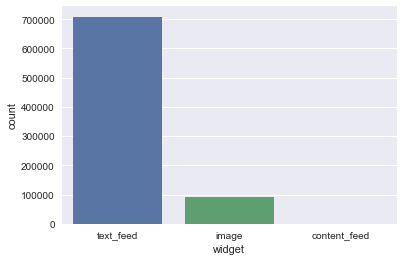

In [12]:
sns.countplot(x="widget", data=ck_df)

In [13]:
import urllib

url_df = df.loc[:,['url', 'referer', 'c_cnt']]
url_df['referer'] = url_df['referer'].apply(urllib.parse.unquote)
url_df['url_domain'] = url_df["url"].str.extract('^(?:https?:\/\/)?(?:[^@\/\n]+@)?(?:www\.)?([^:\/\n]+)')
url_df['referer_domain'] = url_df["referer"].str.extract('^(?:https?:\/\/)?(?:[^@\/\n]+@)?(?:www\.)?([^:\/\n]+)')

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [14]:
url_df.head()

,url,referer,c_cnt,url_domain,referer_domain
0,http://media.breitbart.com/media/if/newsmax.html,http://www.breitbart.com/big-journalism/2018/0...,0.0,media.breitbart.com,breitbart.com
1,http://media.breitbart.com/media/if/newsmax.html,http://www.breitbart.com/jerusalem/,0.0,media.breitbart.com,breitbart.com
2,http://thehill.com/policy/national-security/38...,https://www.google.com/,0.0,thehill.com,google.com
4,http://media.breitbart.com/media/if/newsmax.html,http://www.breitbart.com/,0.0,media.breitbart.com,breitbart.com
5,http://media.breitbart.com/media/if/newsmax.html,http://www.breitbart.com/,0.0,media.breitbart.com,breitbart.com


/usr/local/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


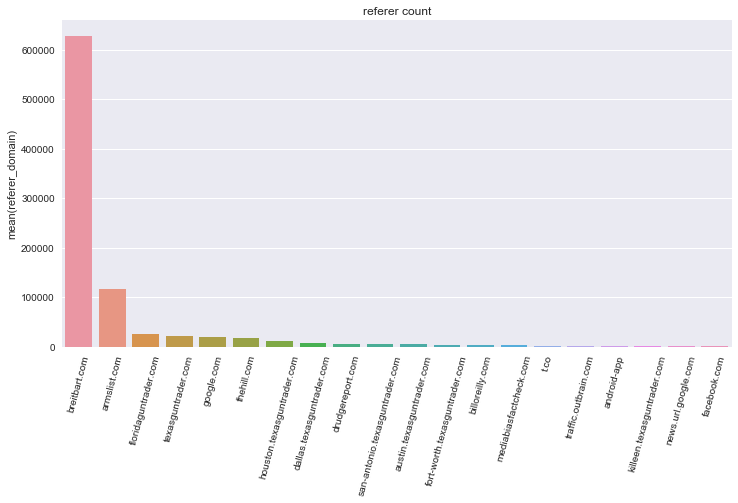

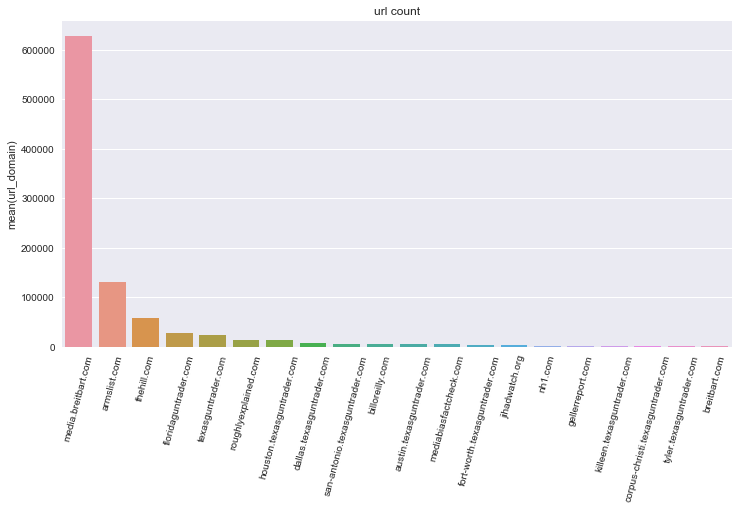

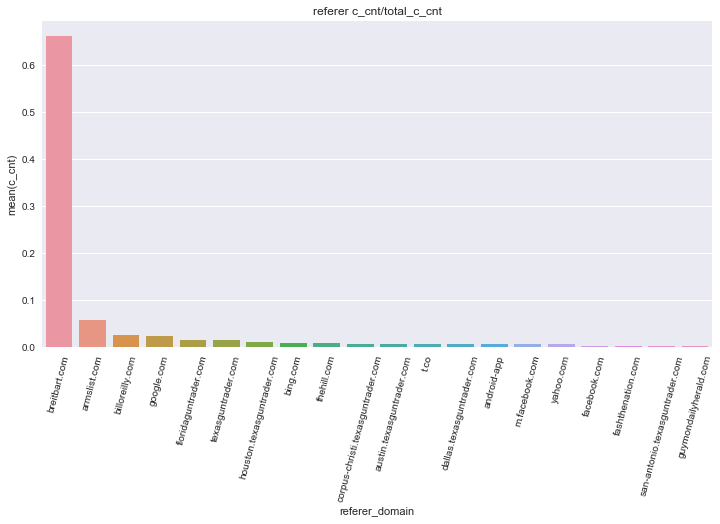

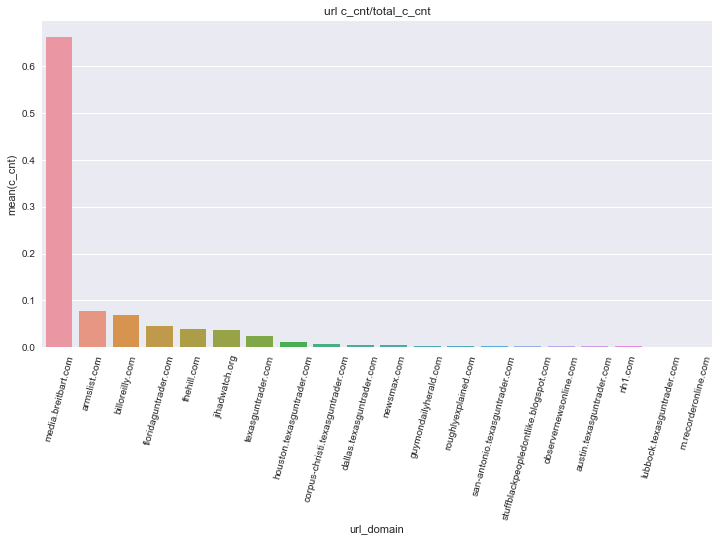

In [20]:
num_domains = 20
figsize = (12, 6)

referer_cnt = url_df.referer_domain.value_counts().sort_values(ascending=False)[:num_domains]
url_cnt = url_df.url_domain.value_counts().sort_values(ascending=False)[:num_domains]

plt.figure(figsize=figsize)

sns.barplot(referer_cnt.index, referer_cnt)
plt.xticks(rotation=75)
plt.title('referer count')
plt.show()

plt.figure(figsize=figsize)


sns.barplot(url_cnt.index, url_cnt)
plt.xticks(rotation=75)
plt.title('url count')
plt.show()

total_c_cnt = url_df['c_cnt'].sum()
referer_c_cnts = url_df.groupby('referer_domain')['c_cnt'].sum().sort_values(ascending=False)[:num_domains] / total_c_cnt
url_c_cnts = url_df.groupby('url_domain')['c_cnt'].sum().sort_values(ascending=False)[:num_domains] / total_c_cnt

plt.figure(figsize=figsize)

sns.barplot(referer_c_cnts.index, referer_c_cnts)
plt.xticks(rotation=75)
plt.title('referer c_cnt/total_c_cnt')
plt.show()

plt.figure(figsize=figsize)

sns.barplot(url_c_cnts.index, url_c_cnts)
plt.xticks(rotation=75)
plt.title('url c_cnt/total_c_cnt')
plt.show()

In [21]:
from sklearn.preprocessing import CategoricalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
X, Y = clean_df.drop('c_cnt', axis=1), clean_df['c_cnt']

In [ ]:
# preprocessing functions

#Turns a timestamp into which minute the time was at - used as a categorical feature.
def timestamp_to_min(timestamp, is_hour=True):
    if is_hour:
        return timestamp.split(':')[0][-2:]
    else: 
        return timestamp.split(':')[1]

#plots frequency of a feature's different classes, useful for exploratory analysis
def plot_freq(col_name, df):
    df_frequency = df.groupby(col_name).agg('count').sort_values('ad_type',ascending=False)
    plt.plot([i for i in range(len(df_frequency.values))], [np.log(i[2]) for i in df_frequency.values])
    plt.show()


#just prints how many unique values are in each feature
def print_column_counts(df):    
    for i in df:
        print(i, df[i].nunique())

#We do some final cleaning, changing all non-numerical features into strings for later.
def preprocess(df):    
    for i in df:
        if i[-1] != 't' or i[-2] != 'n' or i[-3] != 'c':
            df[i] = df[i].astype('str')
    remove_only_ones(df)
    if 'site_id' in df.columns:
        df.drop('site_id',inplace=True,axis=1)
    df['i_timestamp'] = df['i_timestamp'].apply(timestamp_to_min)
    df['r_timestamp'] = df['r_timestamp'].apply(timestamp_to_min)
    
#given a categorical column, we apply our earlier strategy of one-hot-encoding with maximum thresh=200
def transform_column(df, col, thresh=200, return_labels=False):
    print(col)
    df_frequency = df[[col, 'c_cnt']].groupby(col).agg('count').sort_values('c_cnt',ascending=False)
    if df[col].nunique() > thresh:
        enc = CategoricalEncoder(categories=[sorted(df_frequency[0:thresh].index.values)],handle_unknown='ignore')
        labels = df_frequency[0:thresh].index.values
    else:
        enc = CategoricalEncoder(categories=[sorted(df_frequency.index.values)],handle_unknown='ignore')
        labels = df_frequency.index.values
    labels = [str(col) + str(i) for i in labels]
    if return_labels:
        return labels
    enc.fit(df[col].values.reshape(-1, 1))
    return enc.transform(df[col].values.reshape(-1,1)).toarray()

#final preprocessing
preprocess(clean_df)
#this set contains our numerical column names
numerical_features = set(['c_cnt', 'i_cnt', 'r_cnt', 'vi_cnt', 'agg_c_cnt/agg_i_cnt'])
#we create a copy so that X will not include 'c_cnt'
df2 = clean_df.copy()
df2.drop('c_cnt',inplace=True,axis=1)
#u,s,v = np.linalg.svd(X)

In [ ]:
# preprocess training data


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2022: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [45]:
rfc = RandomForestClassifier()
rfc.fit(X[numeric_cols], Y)

KeyError: "['c_cnt'] not in index"

In [ ]:
print(rfc.feature_importances_)
print(rfc.predict([[0, 0, 0, 0]]))